In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Veri Setinin Yüklenmesi (URL Vasıtasıyla)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Aykırı değer (Outlier) analizi
z_scores = np.abs(stats.zscore(data)) #"Ortalamadan kaç standart sapma uzaklıktasın?" sorusunda cevabı z skoru verir
outliers = (z_scores > 3).sum(axis=1)
data_no_outliers = data[(z_scores < 3).all(axis=1)]

# Aykırı değerleri içeren ve içermeyen veri setinin boyutları
print(f"Orijinal Datasetin Boyutları: {data.shape}")
print(f"Aykırı Değerlerin Haricinde Datasetimiz: {data_no_outliers.shape}") # outlier : Aykırı değer

# Veri setinin incelenmesi
data_no_outliers.describe()


Orijinal Datasetin Boyutları: (768, 9)
Aykırı Değerlerin Haricinde Datasetimiz: (688, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.845930,120.293605,72.345930,20.787791,72.507267,32.209157,0.454555,33.094477,0.329942
std,3.279256,30.005790,12.312859,15.405391,90.106939,6.618891,0.284527,11.436990,0.470534
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,43.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.300000,0.605500,40.000000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000,1.000000


In [31]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Normalizasyon

In [22]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_no_outliers), columns=column_names) 
data_normalized.describe()

#0-1 arası değerlerin alındığını görüyoruz


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.295841,0.492217,0.493326,0.346463,0.174716,0.380684,0.272274,0.257329,0.329942
std,0.252250,0.193586,0.125641,0.256757,0.217125,0.179861,0.205732,0.243340,0.470534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.354839,0.408163,0.000000,0.000000,0.250000,0.120752,0.063830,0.000000
50%,0.230769,0.458065,0.489796,0.383333,0.104819,0.375000,0.211135,0.170213,0.000000
75%,0.461538,0.612903,0.571429,0.533333,0.303614,0.491848,0.381417,0.404255,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Özellik Seçimi 1: Korelasyon Matrisi

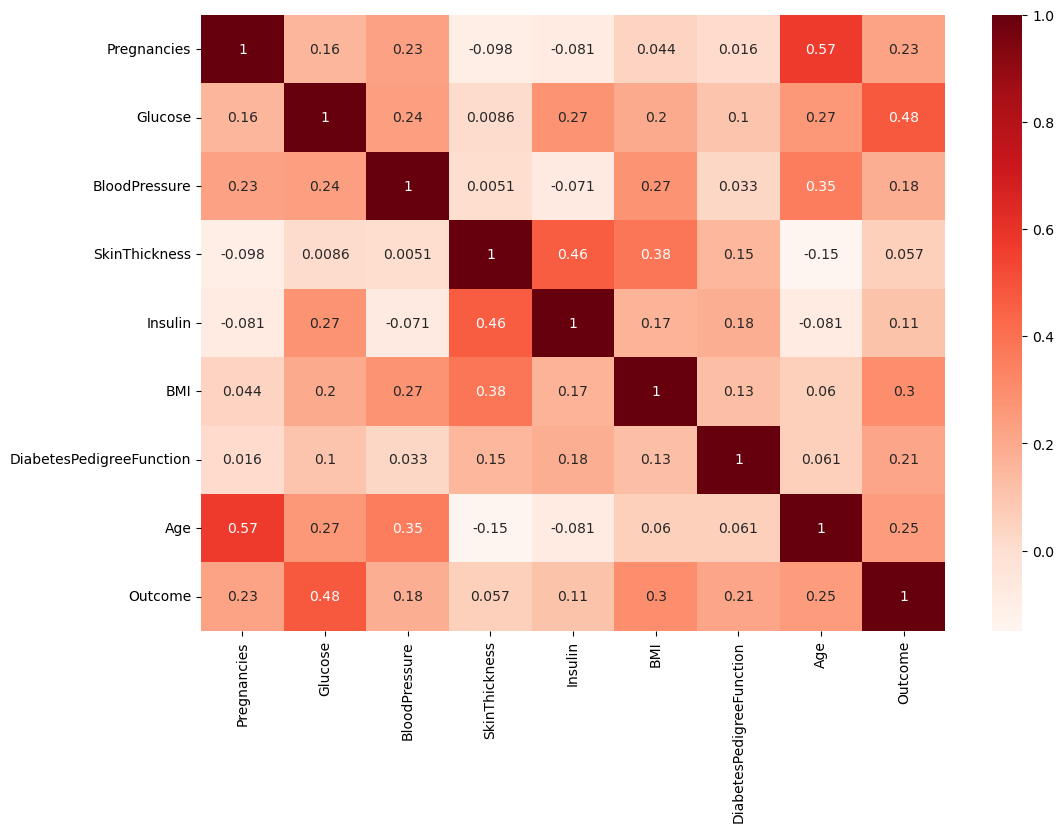

SkinThickness               0.056662
Insulin                     0.110062
BloodPressure               0.182521
DiabetesPedigreeFunction    0.213872
Pregnancies                 0.226382
Age                         0.246290
BMI                         0.298056
Glucose                     0.478614
Outcome                     1.000000
Name: Outcome, dtype: float64

In [23]:
corr_matrix = data_normalized.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds) #sns seaborn kullanımı
plt.show()


corr_matrix['Outcome'].sort_values(ascending=True) 
#Outcome ile diğer featurelar arasındaki korelasyon matrisi. 

#ascending true dediğimiz için korelasyonu düşük olandan yüksek olana doğru sıraladı

# Özellik Seçimi 2 : RFE (Recursive Feature Elimination)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_normalized.drop('Outcome', axis=1)
y = data_normalized['Outcome']

model = LogisticRegression()
rfe = RFE(model,n_features_to_select=3)
fit = rfe.fit(X, y)
selected_features = X.columns[fit.support_]

print("Seçilen Özellik Sayısı: %s" % (fit.n_features_))
print("Seçilen Özellikler (True-False Şeklinde): %s" % (fit.support_))
print("Ranking (Hiyerarşi): %s" % (fit.ranking_))
print(f"Seçilen özellikler (Tablo Adı ile)  : {selected_features}")


#Neden bu 3 özellik seçildi? AYRICA RFE denilen şeyin amacı nedir? Kullandık ama maksadı nedir?

#Lojistik regresyon modeliyle en iyi performansı gösteren özellikler hangileridir?" sorusuna cevap aldık. 

#Bu özellikler, hedef değişken olan diyabet sonucunu tahmin etmede "en etkili olanlar" olarak belirlenmiştir dedik.

Seçilen Özellik Sayısı: 3
Seçilen Özellikler (True-False Şeklinde): [False  True False False False  True  True False]
Ranking (Hiyerarşi): [2 1 6 5 4 1 1 3]
Seçilen özellikler (Tablo Adı ile)  : Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')


# Özellik Seçimi 3: PCA (Principal Component Analysis)

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}\n\n") 
#Veri setindeki toplam varyansın ne kadarını açıkladıklarını gösteren dizi [PC1 = %29.55 gibi]

print(f"Principal components:\n{pca.components_}")

#PC1 için: En çok hangi özelliklerden etkilendi

#Pregnancies: 0.60142582
#Glucose: 0.12918266
#BloodPressure: 0.12623325
#SkinThickness: -0.4211811
#Insulin: -0.25879213
#BMI: -0.06550834
#DiabetesPedigreeFunction: -0.04448145
#Age: 0.59584156

#Özetle 

Explained variance ratio: [0.29547673 0.25038164 0.11544657]


Principal components:
[[ 0.60142582  0.12918266  0.12623325 -0.4211811  -0.25879213 -0.06550834
  -0.04448145  0.59584156]
 [ 0.29722601  0.28548128  0.11142008  0.5980971   0.45697645  0.31894243
   0.25578633  0.28990373]
 [ 0.33779589 -0.51616578 -0.00274636  0.47854122 -0.2778077   0.12084367
  -0.54517149 -0.03827946]]


In [26]:
#Eğitim ve Test verisini bölme (Split ettik)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LOJİSTİK REGRESYON


In [27]:
#Lojistik Regresyon (Zaten Halihazırda Tıbbi Teşhislerde Kullanılan Bir Yöntem)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Lojistik Regresyon Metrikleri:")
print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Kesinlik (Precision): {precision_score(y_test, y_pred_log_reg)}")
print(f"Duyarlılık (Recall): {recall_score(y_test, y_pred_log_reg)}")
print(f"Karmaşıklık Matrisi:\n{confusion_matrix(y_test, y_pred_log_reg)}")


Lojistik Regresyon Metrikleri:
Doğruluk (Accuracy): 0.7681159420289855
Kesinlik (Precision): 0.8620689655172413
Duyarlılık (Recall): 0.4716981132075472
Karmaşıklık Matrisi:
[[81  4]
 [28 25]]


# KARAR AĞACI

In [28]:
#Karar Ağacı
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Karar Ağacı Metrikleri:")
print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred_tree)}")
print(f"Kesinlik (Precision): {precision_score(y_test, y_pred_tree)}")
print(f"Duyarlılık (Recall): {recall_score(y_test, y_pred_tree)}")
print(f"Karmaşıklık Matrisi: \n{confusion_matrix(y_test, y_pred_tree)}")


Karar Ağacı Metrikleri:
Doğruluk (Accuracy): 0.7463768115942029
Kesinlik (Precision): 0.7045454545454546
Duyarlılık (Recall): 0.5849056603773585
Karmaşıklık Matrisi: 
[[72 13]
 [22 31]]


# K En Yakın Komşu

In [29]:
#K En Yakın Komşu
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-NN Metrikleri:")
print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred_knn)}")
print(f"Kesinlik (Precision): {precision_score(y_test, y_pred_knn)}")
print(f"Duyarlılık (Recall): {recall_score(y_test, y_pred_knn)}")
print(f"Karmaşıklık Matrisi:\n{confusion_matrix(y_test, y_pred_knn)}")

#KNN ve Decision Tree Accuracy Skorları aynı. Karmaşıklık Matrislerinden yakınlıkları anlayabiliriz.

K-NN Metrikleri:
Doğruluk (Accuracy): 0.7101449275362319
Kesinlik (Precision): 0.6585365853658537
Duyarlılık (Recall): 0.5094339622641509
Karmaşıklık Matrisi:
[[71 14]
 [26 27]]


In [30]:
def evaluation_of_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Doğruluk (Accuracy): {accuracy}")
    print(f"Kesinlik (Precision): {precision}")
    print(f"Duyarlılık (Recall): {recall}")
    print(f"\n\nConfusion Matrix:\n{cm}")

print("\n\nLojistik Regresyon Hesaplamaları:")
evaluation_of_model(y_test, y_pred_log_reg)

print("\n\nKarar Ağacı Değerlendirmesi:")
evaluation_of_model(y_test, y_pred_tree)

print("\n\nK-NN Değerlendirmesi:")
evaluation_of_model(y_test, y_pred_knn)




Lojistik Regresyon Hesaplamaları:
Doğruluk (Accuracy): 0.7681159420289855
Kesinlik (Precision): 0.8620689655172413
Duyarlılık (Recall): 0.4716981132075472


Confusion Matrix:
[[81  4]
 [28 25]]


Karar Ağacı Değerlendirmesi:
Doğruluk (Accuracy): 0.7463768115942029
Kesinlik (Precision): 0.7045454545454546
Duyarlılık (Recall): 0.5849056603773585


Confusion Matrix:
[[72 13]
 [22 31]]


K-NN Değerlendirmesi:
Doğruluk (Accuracy): 0.7101449275362319
Kesinlik (Precision): 0.6585365853658537
Duyarlılık (Recall): 0.5094339622641509


Confusion Matrix:
[[71 14]
 [26 27]]
